<a href="https://colab.research.google.com/github/Akshata1992/TensorFlow/blob/master/TF2_0_BuildOwnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#Install tensorflow if version is < 2.x

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.3.0


In [91]:
#other imports
import numpy as np
import matplotlib.pyplot as plt

In [92]:
#Define Linear Regression Model

class LinearRegression(tf.keras.Model):
  def __init__(self,num_inputs,num_outputs):
    super(LinearRegression,self).__init__()
    self.W = tf.Variable(tf.random_normal_initializer()((num_inputs,num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W,self.b]

  def call(self,inputs):
    return tf.matmul(inputs,self.W) + self.b

In [93]:
#create dataset
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

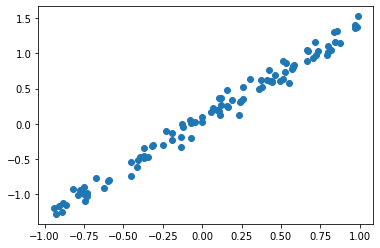

In [94]:
plt.scatter(X,Y)

In [95]:
#Cast the type for tensorflow
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [96]:
#Define the loss

def get_loss(model,inputs,targets):
  predictions = model(inputs)
  errors = targets - predictions
  return tf.reduce_mean(tf.square(errors))

In [97]:
#define Gradient 
def get_gradient(model,inputs,targets):
  with tf.GradientTape() as tape:
    #calcualte the loss
    loss_value = get_loss(model,inputs,targets)

  #return gradient
  return tape.gradient(loss_value,model.params)

In [98]:
#create and train model

model = LinearRegression(D,K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.05495463]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [99]:
#store the losses

losses=[]

#create an optimizer

optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

#Run the training loop

for i in range(100):
  #get the gradients
  grads = get_gradient(model,X,Y)

  #Do one step of gradient descent: param <- param - learning_rate * grad
  optimizer.apply_gradients(zip(grads,model.params))

  #store the loss
  loss = get_loss(model,X,Y)
  losses.append(loss)

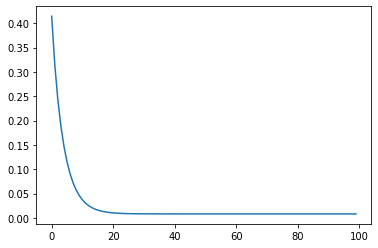

In [100]:
plt.plot(losses)

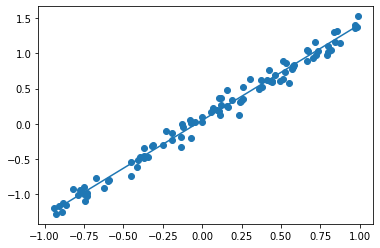

In [117]:
x_axis = np.linspace(X.min(), X.max(),100)
y_axis = model.predict(x_axis.reshape(-1,1)).flatten() #model expects 2D input and 2D output, x_axis is 1D,convert it to 2D

plt.scatter(X,Y)
plt.plot(x_axis,y_axis)